In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import mpl_toolkits.mplot3d 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, PrecisionRecallDisplay, precision_score
from sklearn.metrics import recall_score, classification_report, RocCurveDisplay, auc, roc_curve, precision_recall_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Loading the csv file
y = pd.read_csv('./actual.csv')
print(y.shape)
y.head()
#y

(72, 2)


,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [3]:
# To display the counts of ALL and AML
y['cancer'].value_counts()

ALL    47
AML    25
Name: cancer, dtype: int64

In [4]:
# Coverting class labels to integers i.e., '0' and '1'
y = y.replace({'ALL':0,'AML':1})
labels = ['ALL', 'AML']
y.head()
#y

,patient,cancer
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [5]:
# Reading train data
df_train = pd.read_csv('./data_set_ALL_AML_train.csv')
print(df_train.shape)

# Reading test data
df_test = pd.read_csv('./data_set_ALL_AML_independent.csv')
print(df_test.shape)

df_train.head()
#df_test.head()

(7129, 78)
(7129, 70)


,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [6]:
df_train.columns
#[col for col in df_train.columns if "call" not in col]

Index(['Gene Description', 'Gene Accession Number', '1', 'call', '2', 'call.1',
       '3', 'call.2', '4', 'call.3', '5', 'call.4', '6', 'call.5', '7',
       'call.6', '8', 'call.7', '9', 'call.8', '10', 'call.9', '11', 'call.10',
       '12', 'call.11', '13', 'call.12', '14', 'call.13', '15', 'call.14',
       '16', 'call.15', '17', 'call.16', '18', 'call.17', '19', 'call.18',
       '20', 'call.19', '21', 'call.20', '22', 'call.21', '23', 'call.22',
       '24', 'call.23', '25', 'call.24', '26', 'call.25', '27', 'call.26',
       '34', 'call.27', '35', 'call.28', '36', 'call.29', '37', 'call.30',
       '38', 'call.31', '28', 'call.32', '29', 'call.33', '30', 'call.34',
       '31', 'call.35', '32', 'call.36', '33', 'call.37'],
      dtype='object')

In [7]:
# Removing "call" columns from training and testing data because they seem to provide not much information 

train_to_keep = [col for col in df_train.columns if "call" not in col]
test_to_keep = [col for col in df_test.columns if "call" not in col]

X_train_tr = df_train[train_to_keep]
X_test_tr = df_test[test_to_keep]

In [8]:
# Reordering column names so that they would be in the same order

train_columns_titles = ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', 
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

X_train_tr = X_train_tr.reindex(columns=train_columns_titles)

#X_train_tr

In [9]:
test_columns_titles = ['Gene Description', 'Gene Accession Number','39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53',  '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

X_test_tr = X_test_tr.reindex(columns=test_columns_titles)

#X_test_tr

In [10]:
# Transposing so that the genes become features

X_train = X_train_tr.T
X_test = X_test_tr.T

print(X_train.shape) 
X_train.head()

(40, 7129)


,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [11]:
# Clearing the 2 header rows and making it one keeping only the 2nd column

# For training data
X_train.columns = X_train.iloc[1]
X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

# For testing data
X_test.columns = X_test.iloc[1]
X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

In [12]:
print(X_train.shape)
print(X_test.shape)
X_train.head()

(38, 7129)
(34, 7129)


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [77]:
# Associating the labels from actual.csv into the training and testing files

# Subset the first 38 patient's cancer types
X_train = X_train.reset_index(drop=True)
y_train = y[y.patient <= 38].reset_index(drop=True)

# Subset the rest for testing
X_test = X_test.reset_index(drop=True)
y_test = y[y.patient > 38].reset_index(drop=True)

X_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [14]:
X_train.describe()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,-120.868421,-150.526316,-17.157895,181.394737,-276.552632,-439.210526,-43.578947,-201.184211,99.052632,112.131579,...,178.763158,750.842105,8.815789,399.131579,-20.052632,869.052632,335.842105,19.210526,504.394737,-29.210526
std,109.555656,75.734507,117.686144,117.468004,111.004431,135.458412,219.482393,90.838989,83.178397,211.815597,...,84.826830,298.008392,77.108507,469.579868,42.346031,482.366461,209.826766,31.158841,728.744405,30.851132
min,-476.000000,-327.000000,-307.000000,-36.000000,-541.000000,-790.000000,-479.000000,-463.000000,-82.000000,-215.000000,...,30.000000,224.000000,-178.000000,36.000000,-112.000000,195.000000,41.000000,-50.000000,-2.000000,-94.000000
25%,-138.750000,-205.000000,-83.250000,81.250000,-374.250000,-547.000000,-169.000000,-239.250000,36.000000,-47.000000,...,120.000000,575.500000,-42.750000,174.500000,-48.000000,595.250000,232.750000,8.000000,136.000000,-42.750000
50%,-106.500000,-141.500000,-43.500000,200.000000,-263.000000,-426.500000,-33.500000,-185.500000,99.500000,70.500000,...,174.500000,700.000000,10.500000,266.000000,-18.000000,744.500000,308.500000,20.000000,243.500000,-26.000000
75%,-68.250000,-94.750000,47.250000,279.250000,-188.750000,-344.750000,79.000000,-144.750000,152.250000,242.750000,...,231.750000,969.500000,57.000000,451.750000,9.250000,1112.000000,389.500000,30.250000,487.250000,-11.500000
max,17.000000,-20.000000,265.000000,392.000000,-51.000000,-155.000000,419.000000,-24.000000,283.000000,561.000000,...,356.000000,1653.000000,218.000000,2527.000000,52.000000,2315.000000,1109.000000,115.000000,3193.000000,36.000000


In [15]:
# Convert from integer to float
X_train_fl = X_train.astype(float, 64)
X_test_fl = X_test.astype(float, 64)

# Apply the same scaling to both datasets
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train_fl)
X_test_scl = scaler.transform(X_test_fl)

X_train_scl
#print(X_train_scl.shape)

array([[-0.86149567, -0.03310102, -0.3517011 , ...,  0.54606799,
        -0.43582025, -0.25587506],
       [-0.16772267,  1.03740009,  0.13913948, ..., -0.26704265,
        -0.59574421,  0.49964792],
       [ 0.41504666,  1.35855042, -2.49589941, ...,  0.70869012,
        -0.38436645, -0.38727036],
       ...,
       [-0.85224537, -1.35784615,  1.31887912, ...,  0.22082373,
        -0.35933487,  1.71505444],
       [ 0.8868123 ,  1.74660708,  1.21554426, ..., -0.23451823,
         3.73889051, -0.12447976],
       [ 0.45204788,  0.15423667,  0.13913948, ...,  0.0582016 ,
         2.80298767,  0.95953146]])

In [16]:
pca = PCA()
pca.fit_transform(X_train)

array([[-4.12032149e+03,  8.43574289e+03, -1.39441668e+04, ...,
         2.51106855e+03,  3.92187680e+03,  1.22642865e-11],
       [ 1.86283598e+04,  1.44078238e+04,  1.66177453e+04, ...,
        -2.30960132e+02, -1.04099055e+03,  1.22642865e-11],
       [-1.58238732e+04,  1.40484268e+04,  4.73320627e+04, ...,
         5.48675197e+02, -2.26227734e+03,  1.22642865e-11],
       ...,
       [ 6.50848905e+04, -5.49595793e+04,  1.67854688e+04, ...,
         1.18708820e+01, -1.47894896e+03,  1.22642865e-11],
       [ 4.97670530e+04, -3.81956823e+04,  2.93511865e+03, ...,
         2.66462156e+03,  7.99461277e+02,  1.22642865e-11],
       [ 1.08241948e+04, -1.68550421e+04, -9.46017931e+02, ...,
        -2.04773331e+03, -1.96917341e+03,  1.22642865e-11]])

22 features explain around 90% of the variance. From 7129 features to 22, not too bad.


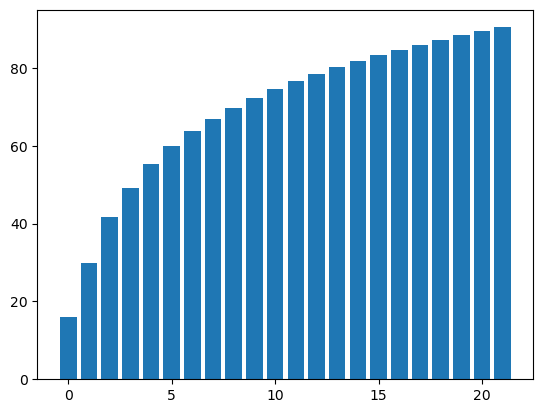

In [17]:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " features explain around 90% of the variance. From 7129 features to ", k, ", not too bad.", sep='')

pca = PCA(n_components=k)
X_train.pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp);

In [70]:
X_train_pca

array([[-4.12032176e+03,  8.43574522e+03, -1.39441660e+04,
        -2.59817022e+04, -1.07709818e+04,  1.46042103e+03,
         9.50056860e+03, -5.43483418e+03,  2.87950069e+03,
        -9.76768294e+03,  1.51174831e+04,  5.84331083e+03,
         3.03683951e+03, -4.04289637e+03,  6.25483682e+03,
        -7.72634601e+03, -5.92867595e+03, -2.90738478e+03,
         7.33294170e+03, -9.76277148e+01, -5.86328554e+03,
        -3.04804845e+03],
       [ 1.86283597e+04,  1.44078246e+04,  1.66177453e+04,
        -2.03824194e+03,  1.06283145e+04,  1.34377404e+04,
        -1.63331326e+03, -2.63986734e+04, -1.18671604e+04,
         2.60565351e+03, -1.46412781e+04,  1.05112272e+04,
        -1.82841700e+04, -6.18428432e+03,  8.95487240e+02,
        -1.80183571e+03,  1.12639616e+04,  7.77370076e+03,
         7.23410174e+03, -4.43093000e+03,  6.82728444e+03,
         3.53557730e+03],
       [-1.58238735e+04,  1.40484268e+04,  4.73320637e+04,
        -1.60642349e+04,  2.29135397e+04,  2.75483301e+03,
    

[Text(-60000.0, 0, ''),
 Text(-40000.0, 0, ''),
 Text(-20000.0, 0, ''),
 Text(0.0, 0, ''),
 Text(20000.0, 0, ''),
 Text(40000.0, 0, ''),
 Text(60000.0, 0, ''),
 Text(80000.0, 0, '')]

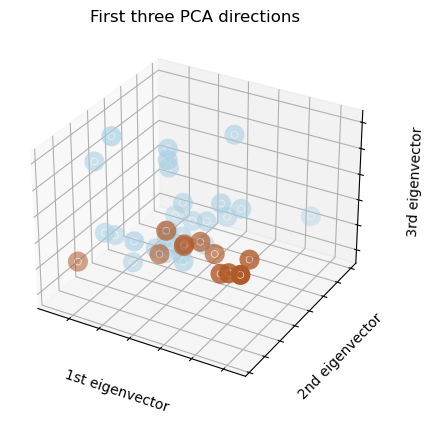

In [75]:
pca3 = PCA(n_components=3).fit(X_train)
X_train_reduced = pca3.transform(X_train)

plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
#ax = Axes3D(fig, elev=-150, azim=110,)
ax = plt.subplot(111, projection="3d")

ax.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], X_train_reduced[:, 2], c = y_train.iloc[:,1], cmap = plt.cm.Paired, linewidths=10)

ax.set_title("First three PCA directions")

ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

#X_train_reduced[:, 0]

Text(0.5, 1.0, '2D Transformation of the Above Graph ')

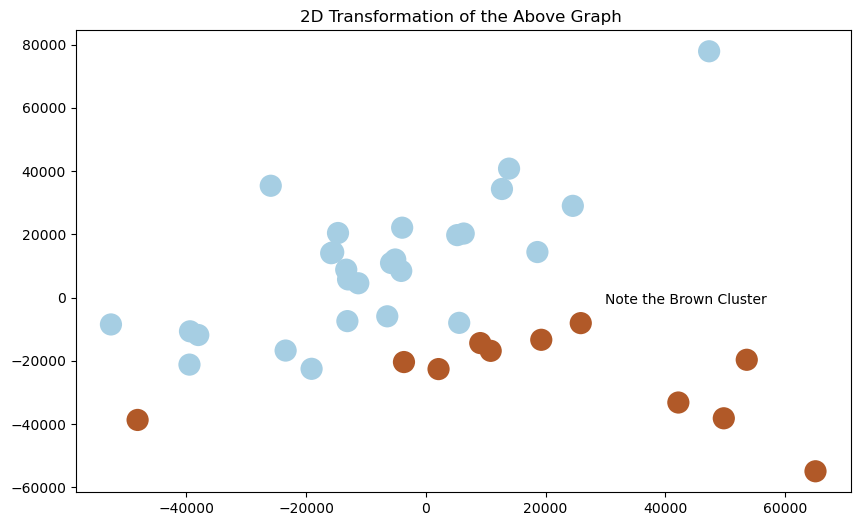

In [19]:
fig = plt.figure(1, figsize = (10, 6))
plt.scatter(X_train_reduced[:, 0],  X_train_reduced[:, 1], c = y_train.iloc[:,1], cmap = plt.cm.Paired, linewidths=10)
plt.annotate('Note the Brown Cluster', xy = (30000,-2000))
plt.title("2D Transformation of the Above Graph ")

In [20]:
print("Simply predicting everything as acute lymphoblastic leukemia (ALL) results in an accuracy of ", 
      round(1 - np.mean(y_test.iloc[:,1]), 3), ".", sep = '')

Simply predicting everything as acute lymphoblastic leukemia (ALL) results in an accuracy of 0.588.


In [21]:
y_test.iloc[:,1]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    1
14    1
15    1
16    0
17    0
18    1
19    1
20    0
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    0
29    0
30    0
31    0
32    0
33    0
Name: cancer, dtype: int64

In [78]:
# Parameter grid
svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], "kernel": ["linear", "rbf", "poly"], "decision_function_shape" : ["ovo", "ovr"]} 

svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=3)
svm_grid.fit(X_train_pca, y_train.iloc[:,1])

#print("Best Parameters:\n", svm_grid.best_params_)

best_svc = svm_grid.best_estimator_
svm_pred = best_svc.predict(X_test_pca)

print('SVM accuracy:', round(accuracy_score(y_test.iloc[:,1], svm_pred), 3))
print('SVM precision:', round(precision_score(y_test.iloc[:,1], svm_pred), 3))
print('SVM recall:', round(recall_score(y_test.iloc[:,1], svm_pred), 3))
print('SVM classification report:')
print(classification_report(y_test.iloc[:,1], svm_pred))

SVM accuracy: 0.941
SVM precision: 0.875
SVM recall: 1.0
SVM classification report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.88      1.00      0.93        14

    accuracy                           0.94        34
   macro avg       0.94      0.95      0.94        34
weighted avg       0.95      0.94      0.94        34



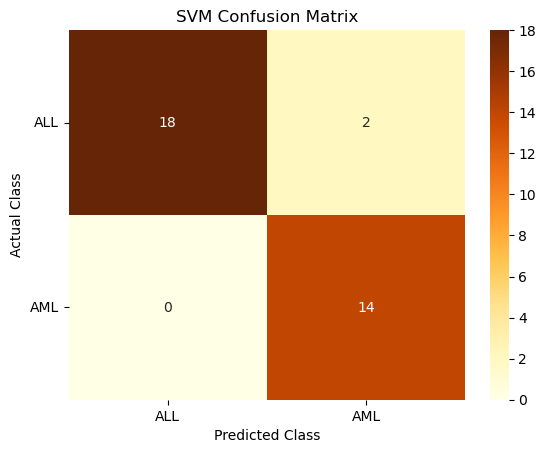

In [95]:
cm_svm =  confusion_matrix(y_test.iloc[:,1], svm_pred)

ax = plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax, fmt='g', cmap='YlOrBr') 

ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class') 
ax.set_title('SVM Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360);

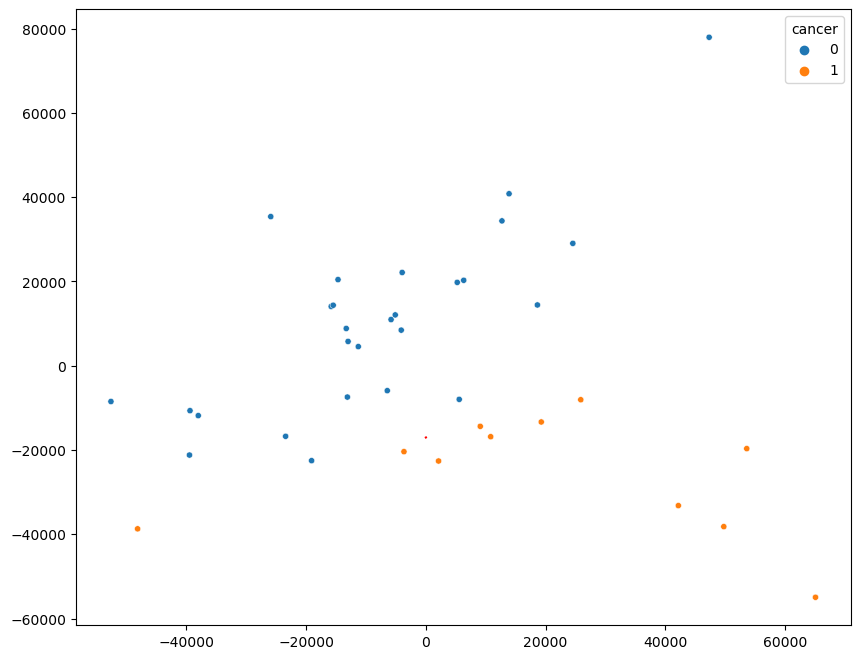

In [81]:
svc_model = SVC(kernel='linear', random_state=32)
svc_model.fit(X_train_pca, y_train.iloc[:,1])

plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train_pca[:, 0],
                y = X_train_pca[:, 1], 
                hue=y_train.iloc[:,1], 
                s=20);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-5, 5)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

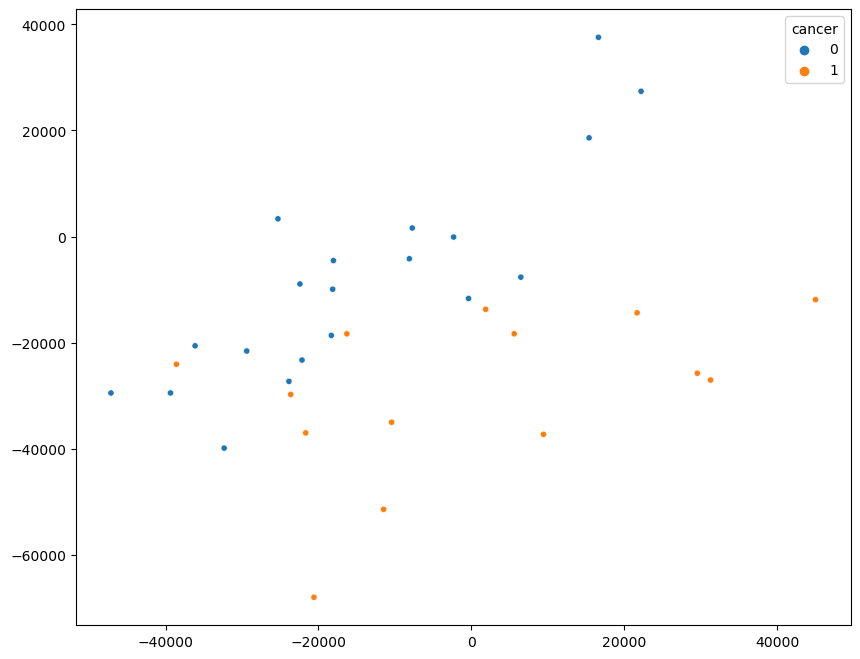

In [64]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_test_pca[:, 0],
                y = X_test_pca[:, 1], 
                hue=y_test.iloc[:,1], 
                s=20);

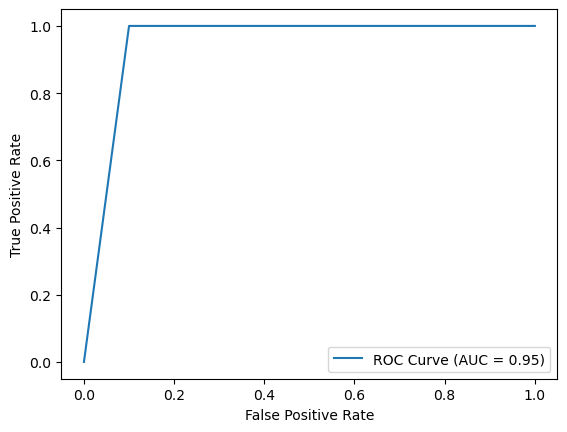

[0. 1. 1.] [0.  0.1 1. ]


In [89]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test.iloc[:,1], svm_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC Curve')
display.plot()
plt.show()
print(tpr,fpr)

In [24]:
clf = SVC(random_state=0).fit(X_train_pca, y_train.iloc[:,1])
#RocCurveDisplay.from_estimator(clf, X_test_pca, y_test.iloc[:,1])
#plt.show()

In [96]:
#ROC Curve
#y_score = clf.decision_function(X_test_pca)
#fpr, tpr, _ = roc_curve(y_test.iloc[:,1], y_score, pos_label=clf.classes_[1])
#roc_auc = auc(fpr, tpr)
#roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC Curve').plot()
#print("TPR : ", tpr)
#print("FPR : ", fpr)

Precision :  [0.93333333 0.92857143 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ] 

Recall :  [1.         0.92857143 0.92857143 0.85714286 0.78571429 0.71428571
 0.64285714 0.57142857 0.5        0.42857143 0.35714286 0.28571429
 0.21428571 0.14285714 0.07142857 0.        ] 

---------------------------------------------------------------------------------------
AUC-PR :  0.995


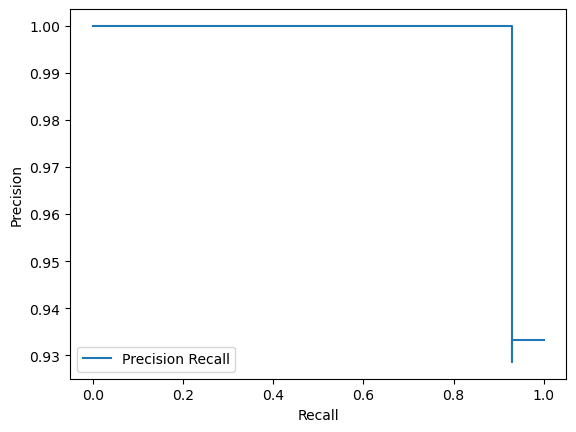

In [93]:
#Precision recall curve
prec, recall, _ = precision_recall_curve(y_test.iloc[:,1], y_score, pos_label=clf.classes_[1])
pr_auc = auc(recall, prec)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, estimator_name='Precision Recall').plot()
print("Precision : ", prec, "\n")
print("Recall : ", recall, "\n")
print("---------------------------------------------------------------------------------------")
print("AUC-PR : ", round(pr_auc,3))